# Translating text with Tesseract and TextBlob

Using PyTesseract, we can extract text from images. Once we have the text, we can the TextBlob library to perform translations in several languages. In this example, we consider translations with English and non-English.

To hand on with translation, two poems are used, Enigma by Edgar Allan Poe and O Amor Quando Se Revela by Fernando Pessoa. We translate English to Portuguese, Portuguese to French and Portuguese to English.

## Importing libraries

In [1]:
from imutils import paths
from textblob import TextBlob
import cv2 as cv
import pytesseract as tsr
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
dataset = 'dataset'
pathImages = list(paths.list_images(dataset)) # list of image paths

**Visualizing the datset**

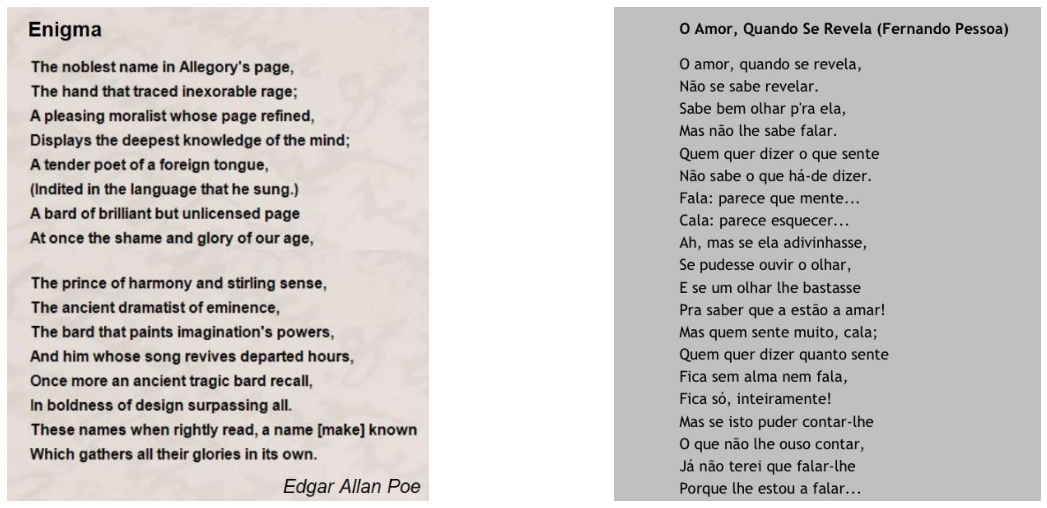

In [3]:
images = []
count = 1
plt.figure(figsize=(20,20))

for i in pathImages:
    img = cv.imread(i)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    images.append(img)
    ax = plt.subplot(2,2,count)
    plt.imshow(img)
    plt.axis('off')
    count += 1
plt.show()

## English Translation

We start the translation extracting the text, to do it, we use the pytesseract function, image_to_string to OCR the image. The second step is the text cleaning, obtaining the good text formatting to perform translations.

**OCR'ing the image**

In [4]:
en_text = tsr.image_to_string(images[0])

In [5]:
en_text

"Enigma\n\nThe noblest name in Allegory's page,\n\nThe hand that traced inexorable rage;\n\nA pleasing moralist whose page refined,\nDisplays the deepest knowledge of the mind;\nA tender poet of a foreign tongue,\n\n(Indited in the language that he sung.)\n\nA bard of brilliant but unlicensed page\nAtonce the shame and glory of our age,\n\nThe prince of harmony and stirling sense,\n\nThe ancient dramatist of eminence,\n\nThe bard that paints imagination's powers,\n\nAnd him whose song revives departed hours,\n\nOnce more an ancient tragic bard recall,\n\nIn boldness of design surpassing all.\n\nThese names when rightly read, a name [make] known\nWhich gathers all their glories in its own.\n\nEdgar Allan Poe\n\x0c"

**Text Cleaning**

In [6]:
# excluding \n\n into \n
en_text_c = en_text.replace("\n\n", "\n")

In [7]:
# splitting the text into line by line
en_text_c = en_text_c.split("\n")

In [8]:
text = [] # empty list to store the text

In [9]:
#loop to erase \x0c and print out of the OCR'ed text
print('Text after OCR')
print('\n')
for i in en_text_c[:-1]:
    print(i)
    text.append(i)

Text after OCR


Enigma
The noblest name in Allegory's page,
The hand that traced inexorable rage;
A pleasing moralist whose page refined,
Displays the deepest knowledge of the mind;
A tender poet of a foreign tongue,
(Indited in the language that he sung.)
A bard of brilliant but unlicensed page
Atonce the shame and glory of our age,
The prince of harmony and stirling sense,
The ancient dramatist of eminence,
The bard that paints imagination's powers,
And him whose song revives departed hours,
Once more an ancient tragic bard recall,
In boldness of design surpassing all.
These names when rightly read, a name [make] known
Which gathers all their glories in its own.
Edgar Allan Poe


**Translate**

To translate the text, we have a loop for. As we have a limit of words, we must consider the list of phrases. To store the translated text, we create an empty list called trans_pt and trans_fr.

Steps:

- start the main loop
- To prepare each phrase, we consider the TextBlob class
- Once we have the text in the textblob format, we use the attribute translate
    - this attribute requires two arguments from_lang (original language) and to (language to be translated)
- We add the translation to the list of translations.

**Issue**

Using TextBlob to perform translation, we can found some issues, in this example, when we have words that are similar in both languages, the library returns "Translation API returned the input string unchanged.". This is the reason why we consider a counter inside the main loop. In Portuguese the word Enigma is similar to English, we skip this word during the translation. The same issue occurs to the word Poe, it has correspondence in French and Portuguese. Other issue I've found is with punctuation, even if we consider a tokenizer, sentences with punctuation tend to fail.

**Translation into the Portuguese (comparison between the original and translated text)**

In [10]:
trans_pt = [] # empty list to store the translated text
count = 1
for i in text[1:-1]: # loop inside the list of texts, excluding the first and the last item
    if count == 1: # count to print out and add the first word that's similar to portuguese
        trans_pt.append(text[0])
        print(text[0])
        print(text[0])
        print('\n')
    elif count >= 1:# condition to perform translations
        print(i) # printing out the original text
        tb = TextBlob(i) # formatting the text into blob format
        translated = tb.translate(from_lang='en', to='pt') # translating en ---> pt
        trans_pt.append(translated) # adding the translation
        print(translated) # printing out the translation
        print('\n')
    count += 1
    if count == len(text) - 1: # condition to print out and add the last sentence in the list of translations
        trans_pt.append(text[-1])
        print(text[-1])

Enigma
Enigma


The hand that traced inexorable rage;
A mão que traçou uma raiva inexorável;


A pleasing moralist whose page refined,
Um moralista agradável cuja página foi refinada,


Displays the deepest knowledge of the mind;
Mostra o conhecimento mais profundo da mente;


A tender poet of a foreign tongue,
Um terno poeta de língua estrangeira,


(Indited in the language that he sung.)
(Citado no idioma que ele cantou.)


A bard of brilliant but unlicensed page
Um bardo de página brilhante, mas não licenciada


Atonce the shame and glory of our age,
Expiar a vergonha e a glória de nossa época,


The prince of harmony and stirling sense,
O príncipe da harmonia e senso forte,


The ancient dramatist of eminence,
O antigo dramaturgo de eminência,


The bard that paints imagination's powers,
O bardo que pinta os poderes da imaginação,


And him whose song revives departed hours,
E aquele cuja música revive nas horas passadas,


Once more an ancient tragic bard recall,
Mais uma vez, uma

**Visualizing the translation EN --> PT**

In [11]:
count = 0
for i in trans_pt[:-1]:
    if count ==0:
        print(i)
        print('\n')
    if count > 0 and count < 7:
        print(i)
    if count == 7:
        print(i)
        print('\n')
    elif count >= 7:
        print(i)
    count += 1
    if count == len(trans_pt) -1:
        print('\n')
        print(trans_pt[-1])

Enigma


A mão que traçou uma raiva inexorável;
Um moralista agradável cuja página foi refinada,
Mostra o conhecimento mais profundo da mente;
Um terno poeta de língua estrangeira,
(Citado no idioma que ele cantou.)
Um bardo de página brilhante, mas não licenciada
Expiar a vergonha e a glória de nossa época,


O príncipe da harmonia e senso forte,
O antigo dramaturgo de eminência,
O bardo que pinta os poderes da imaginação,
E aquele cuja música revive nas horas passadas,
Mais uma vez, uma antiga e trágica recordação de bardo,
Na ousadia de um design que ultrapassa tudo.
Esses nomes, quando lidos corretamente, um nome [torná-lo] conhecido
Que reúne todas as suas glórias em seu próprio.


Edgar Allan Poe


**Translation into the French (comparison between the original and translated text)**

In [12]:
trans_fr = []
count = 1
for i in text[:-1]:
    print(i)
    tb = TextBlob(i)
    translated = tb.translate(from_lang='en', to='fr')
    trans_fr.append(translated)
    print(translated)
    print('\n')
    count += 1
    if count == len(text):
        print(text[-1])
        trans_fr.append(text[-1])
    

Enigma
Énigme


The noblest name in Allegory's page,
Le nom le plus noble de la page d'Allégorie,


The hand that traced inexorable rage;
La main qui traçait une rage inexorable ;


A pleasing moralist whose page refined,
Un moraliste sympathique dont la page s'affine,


Displays the deepest knowledge of the mind;
Affiche la connaissance la plus profonde de l'esprit ;


A tender poet of a foreign tongue,
Un tendre poète d'une langue étrangère,


(Indited in the language that he sung.)
(Indit dans la langue qu'il chantait.)


A bard of brilliant but unlicensed page
Un barde de page brillante mais sans licence


Atonce the shame and glory of our age,
Atonce la honte et la gloire de notre époque,


The prince of harmony and stirling sense,
Le prince de l'harmonie et du sens émouvant,


The ancient dramatist of eminence,
L'ancien dramaturge d'éminence,


The bard that paints imagination's powers,
Le barde qui peint les pouvoirs de l'imagination,


And him whose song revives departed hours,

**Visualizing the translation EN --> FR**

In [13]:
count = 0
for i in trans_fr[:-1]:
    if count ==0:
        print(i)
        print('\n')
    if count > 0 and count < 8:
        print(i)
    if count == 8:
        print(i)
        print('\n')
    elif count >= 8:
        print(i)
    count += 1
    if count == len(trans_fr) -1:
        print('\n')
        print(trans_fr[-1])

Énigme


Le nom le plus noble de la page d'Allégorie,
La main qui traçait une rage inexorable ;
Un moraliste sympathique dont la page s'affine,
Affiche la connaissance la plus profonde de l'esprit ;
Un tendre poète d'une langue étrangère,
(Indit dans la langue qu'il chantait.)
Un barde de page brillante mais sans licence
Atonce la honte et la gloire de notre époque,


Le prince de l'harmonie et du sens émouvant,
L'ancien dramaturge d'éminence,
Le barde qui peint les pouvoirs de l'imagination,
Et celui dont le chant fait revivre les heures disparues,
Une fois de plus un ancien rappel de barde tragique,
Dans l'audace du design surpassant tout.
Ces noms bien lus, un nom [faire] connaître
Qui rassemble toutes leurs gloires dans la sienne.


Edgar Allan Poe


## Non-English Translation

For non-English translation, we must do one single changing. It's about the text extraction using PyTesseract. When using the function image_to_string, we can pass some arguments. One of these argument is config, that accepts a string format with some option. For this example, we consider the argument `-l` `--language`, using it, the result of the OCR'ed text will be formatted according the required language. This is a Tesseract function, the argument config takes care about Tesseract arguments.

**OCR'ing the image**

In [14]:
pt_text = tsr.image_to_string(images[-1])

In [15]:
pt_text

"0 Amor, Quando Se Revela (Fernando Pessoa)\n\n0 amor, quando se revela,\nN&o se sabe revelar.\n\nSabe bem olhar p'ra ela,\n\nMas néo lhe sabe falar.\n\nQuem quer dizer o que sente\nNéo sabe o que ha-de dizer.\nFala: parece que mente...\nCala: parece esquecer...\n\nAh, mas se ela adivinhasse,\nSe pudesse ouvir o olhar,\n\nE se um olhar lhe bastasse\nPra saber que a estao a amar!\nMas quem sente muito, cala;\nQuem quer dizer quanto sente\nFica sem alma nem fala,\n\nFica so, inteiramente!\n\nMas se isto puder contar-lhe\n0 que nao lhe ouso contar,\nJa ndo terei que falar-lhe\nPorque lhe estou a falar...\n\x0c"

As we can note, there's not accentuation, so this is not a good format to the Portuguese language. We must configure our OCR to Portuguese.

In [16]:
conf = '-l por'
pt_text = tsr.image_to_string(images[1], config=conf)

In [17]:
pt_text

"O Amor, Quando Se Revela (Fernando Pessoa)\n\nO amor, quando se revela,\nNão se sabe revelar.\n\nSabe bem olhar p'ra ela,\n\nMas não lhe sabe falar.\n\nQuem quer dizer o que sente\nNão sabe o que há-de dizer.\nFala: parece que mente...\nCala: parece esquecer...\n\nAh, mas se ela adivinhasse,\nSe pudesse ouvir o olhar,\n\nE se um olhar lhe bastasse\nPra saber que a estão a amar!\nMas quem sente muito, cala;\nQuem quer dizer quanto sente\nFica sem alma nem fala,\n\nFica só, inteiramente!\n\nMas se isto puder contar-lhe\nO que não lhe ouso contar,\nJá não terei que falar-lhe\nPorque lhe estou a falar...\n\x0c"

Now the text shows the proper accentuation for the Portuguese language.

**Text Cleaning**

In [18]:
pt_text_c = pt_text.replace("\n\n", "\n")

In [19]:
pt_text_c

"O Amor, Quando Se Revela (Fernando Pessoa)\nO amor, quando se revela,\nNão se sabe revelar.\nSabe bem olhar p'ra ela,\nMas não lhe sabe falar.\nQuem quer dizer o que sente\nNão sabe o que há-de dizer.\nFala: parece que mente...\nCala: parece esquecer...\nAh, mas se ela adivinhasse,\nSe pudesse ouvir o olhar,\nE se um olhar lhe bastasse\nPra saber que a estão a amar!\nMas quem sente muito, cala;\nQuem quer dizer quanto sente\nFica sem alma nem fala,\nFica só, inteiramente!\nMas se isto puder contar-lhe\nO que não lhe ouso contar,\nJá não terei que falar-lhe\nPorque lhe estou a falar...\n\x0c"

In [20]:
pt_text_c = pt_text_c.split("\n")

In [21]:
pt_text_c.remove('\x0c')

In [22]:
text = pt_text_c

In [23]:
print("Text after OCR")
print("\n")

for i in text:
    print(i)

Text after OCR


O Amor, Quando Se Revela (Fernando Pessoa)
O amor, quando se revela,
Não se sabe revelar.
Sabe bem olhar p'ra ela,
Mas não lhe sabe falar.
Quem quer dizer o que sente
Não sabe o que há-de dizer.
Fala: parece que mente...
Cala: parece esquecer...
Ah, mas se ela adivinhasse,
Se pudesse ouvir o olhar,
E se um olhar lhe bastasse
Pra saber que a estão a amar!
Mas quem sente muito, cala;
Quem quer dizer quanto sente
Fica sem alma nem fala,
Fica só, inteiramente!
Mas se isto puder contar-lhe
O que não lhe ouso contar,
Já não terei que falar-lhe
Porque lhe estou a falar...


**Translate**

The only change will be for the arguments in the attribute translate, `from_lang='pt'` and `to='en or fr'`. The rest of the code is similar to what we did in the above lines.

**Translation into the English (comparison between the original and translated text)**

In [24]:
trans_en = []
count = 1
for i in text:
    print(i)
    tb = TextBlob(i)
    translated = tb.translate(from_lang='pt', to='en')
    trans_en.append(translated)
    print(translated)
    print('\n')    

O Amor, Quando Se Revela (Fernando Pessoa)
Love, When It Reveals Itself (Fernando Pessoa)


O amor, quando se revela,
Love, when it reveals itself,


Não se sabe revelar.
It is not known to reveal.


Sabe bem olhar p'ra ela,
It feels good to look at her,


Mas não lhe sabe falar.
But he doesn't know how to talk to you.


Quem quer dizer o que sente
who wants to say what you feel


Não sabe o que há-de dizer.
He doesn't know what to say.


Fala: parece que mente...
Spoken: it seems like it lies...


Cala: parece esquecer...
Cala: seems to forget...


Ah, mas se ela adivinhasse,
Ah, but if she guessed,


Se pudesse ouvir o olhar,
If you could hear the look,


E se um olhar lhe bastasse
And if one look was enough for you


Pra saber que a estão a amar!
To know you're in love!


Mas quem sente muito, cala;
But whoever is sorry, shuts up;


Quem quer dizer quanto sente
who wants to say how sorry


Fica sem alma nem fala,
It has no soul or speech,


Fica só, inteiramente!
It is entirely alon

**Visualizing the translation PT --> EN**

In [25]:
count = 1
for i in trans_en:
    if count == 1:
        print(i)
        print('\n')
    else:
        print(i)
    count += 1

Love, When It Reveals Itself (Fernando Pessoa)


Love, when it reveals itself,
It is not known to reveal.
It feels good to look at her,
But he doesn't know how to talk to you.
who wants to say what you feel
He doesn't know what to say.
Spoken: it seems like it lies...
Cala: seems to forget...
Ah, but if she guessed,
If you could hear the look,
And if one look was enough for you
To know you're in love!
But whoever is sorry, shuts up;
who wants to say how sorry
It has no soul or speech,
It is entirely alone!
But if this can tell you
What I dare not tell you,
I won't have to talk to you anymore
Because I'm talking to you...


**Translation into the French (comparison between the original and translated text)**

In [26]:
trans_pt_fr = []
count = 1
for i in text:
    print(i)
    tb = TextBlob(i)
    translated = tb.translate(from_lang='pt', to='fr')
    trans_pt_fr.append(translated)
    print(translated)
    print('\n')

O Amor, Quando Se Revela (Fernando Pessoa)
L'amour, quand il se révèle (Fernando Pessoa)


O amor, quando se revela,
L'amour, quand il se révèle,


Não se sabe revelar.
Il n'est pas connu de révéler.


Sabe bem olhar p'ra ela,
ça fait du bien de la regarder,


Mas não lhe sabe falar.
Mais il ne sait pas comment vous parler.


Quem quer dizer o que sente
qui veut dire ce que tu ressens


Não sabe o que há-de dizer.
Il ne sait pas quoi dire.


Fala: parece que mente...
Parlées : on dirait que ça ment...


Cala: parece esquecer...
Cala : semble oublier...


Ah, mas se ela adivinhasse,
Ah, mais si elle devinait,


Se pudesse ouvir o olhar,
Si tu pouvais entendre le regard,


E se um olhar lhe bastasse
Et si un regard te suffisait


Pra saber que a estão a amar!
De savoir que tu es amoureux !


Mas quem sente muito, cala;
Mais celui qui est désolé, se taise;


Quem quer dizer quanto sente
qui veut dire combien désolé


Fica sem alma nem fala,
Il n'a ni âme ni parole,


Fica só, inteiramente

**Visualizing the translation PT --> EN**

In [27]:
count = 1
for i in trans_pt_fr:
    if count == 1:
        print(i)
        print('\n')
    else:
        print(i)
    count += 1

L'amour, quand il se révèle (Fernando Pessoa)


L'amour, quand il se révèle,
Il n'est pas connu de révéler.
ça fait du bien de la regarder,
Mais il ne sait pas comment vous parler.
qui veut dire ce que tu ressens
Il ne sait pas quoi dire.
Parlées : on dirait que ça ment...
Cala : semble oublier...
Ah, mais si elle devinait,
Si tu pouvais entendre le regard,
Et si un regard te suffisait
De savoir que tu es amoureux !
Mais celui qui est désolé, se taise;
qui veut dire combien désolé
Il n'a ni âme ni parole,
C'est tout seul !
Mais si cela peut te dire
Ce que je n'ose pas te dire,
je n'aurai plus à te parler
Parce que je te parle...


## Conclusion

With Tesseract and TextBlob, we can build a good translator. On the other hand, when using this approach we're confronted with the text pre-processing, we've built a model for these specifics images. If you're using image with a complex background, you must also consider the image pre-processing.

Other problem is the translator from  TextBlob, there's a limit of words, so you cannot pass the entire text. I've also found problem with punctuation. The results of the translations is satisfying, we cannot attempt to a very accurate translation, for such, we must think to use a more accurate NLP model to perform translation. In this example, we've translated line by line, it can broke the sense of the poem during the translation. In generally, we've a good translation, specially when translating into English or, from English to another language.